# COMP 472 Assignment 1
## Team: RoboCops
### Team Members:
- Rongxi Meng (40045067)
- Chen Qian (27867808)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, f1_score

## Section 2.1: Load the Dataset in Python
In this section, we will load the dataset and prepare it for the machine learning models.

### 2.1(a) Preprocessing the Penguin Dataset
The Penguin dataset contains string features 'island' and 'sex' that need to be converted to a numerical format suitable for MLP models. We will explore two methods for this conversion:
- **Method i**: Convert these features into 1-hot vectors (also known as dummy-coded data).
- **Method ii**: Manually convert these features into numerical categories.

### 2.1(b) Assessing the Abalone Dataset
We need to determine if the Abalone dataset can be used in its current form. If it contains features similar to the Penguin dataset that need conversion, we will apply the two methods mentioned above to transform any string features into a numerical format.

In [3]:
# Load the datasets
penguins_data = pd.read_csv("./datasets/penguins.csv")
abalone_data = pd.read_csv("./datasets/abalone.csv")

In [4]:
# Display the first few rows of each dataset to verify
penguins_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [5]:
abalone_data.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


In [6]:
# For penguins_data
penguins_data_encoded = pd.get_dummies(penguins_data, columns=['island', 'sex'], drop_first=False)

# Convert boolean values to integers (0 and 1) for the one-hot encoded columns
encoded_columns = [col for col in penguins_data_encoded.columns if 'Type_' in col]
penguins_data_encoded[encoded_columns] = penguins_data_encoded[encoded_columns].astype(int)

In [7]:
# 'Type' is the original column with 'M', 'F', 'I' values for sex
# This column will be the target variable, so we don't include it in the one-hot encoding process

# Separate the features and the target variable
x_abalone = abalone_data.drop('Type', axis=1)  # Features
y_abalone = abalone_data['Type']  # Target variable

# Encode the target variable 'Type'
abalone_data_encoded = pd.get_dummies(y_abalone, drop_first=False)

In [8]:
# Display the first few rows to verify
print(penguins_data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   culmen_length_mm   333 non-null    float64
 2   culmen_depth_mm    333 non-null    float64
 3   flipper_length_mm  333 non-null    int64  
 4   body_mass_g        333 non-null    int64  
 5   island_Biscoe      333 non-null    bool   
 6   island_Dream       333 non-null    bool   
 7   island_Torgersen   333 non-null    bool   
 8   sex_FEMALE         333 non-null    bool   
 9   sex_MALE           333 non-null    bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 14.8+ KB
None


In [9]:
# Display the first few rows to verify
print(penguins_data_encoded.head())

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7                181         3750   
1  Adelie              39.5             17.4                186         3800   
2  Adelie              40.3             18.0                195         3250   
3  Adelie              36.7             19.3                193         3450   
4  Adelie              39.3             20.6                190         3650   

   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0          False         False              True       False      True  
1          False         False              True        True     False  
2          False         False              True        True     False  
3          False         False              True        True     False  
4          False         False              True       False      True  


In [10]:
x_abalone.head()

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


In [11]:
x_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LongestShell   4177 non-null   float64
 1   Diameter       4177 non-null   float64
 2   Height         4177 non-null   float64
 3   WholeWeight    4177 non-null   float64
 4   ShuckedWeight  4177 non-null   float64
 5   VisceraWeight  4177 non-null   float64
 6   ShellWeight    4177 non-null   float64
 7   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [12]:
# Display the first few rows to verify
print(abalone_data_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F       4177 non-null   bool 
 1   I       4177 non-null   bool 
 2   M       4177 non-null   bool 
dtypes: bool(3)
memory usage: 12.4 KB
None


In [13]:
# Display the first few rows to verify
abalone_data_encoded.head()

,F,I,M
0,True,False,False
1,False,False,True
2,False,False,True
3,True,False,False
4,False,False,True


## 2.2 Plot the percentage of instances in each output class
- Store the graphic in a file called `penguin-classes.gif` / `abalone-classes.gif`.
- This analysis of the dataset will allow you to determine if the classes are balanced.
- Decide which metric is more appropriate to evaluate the performance.
- Be prepared to discuss this at the demo.

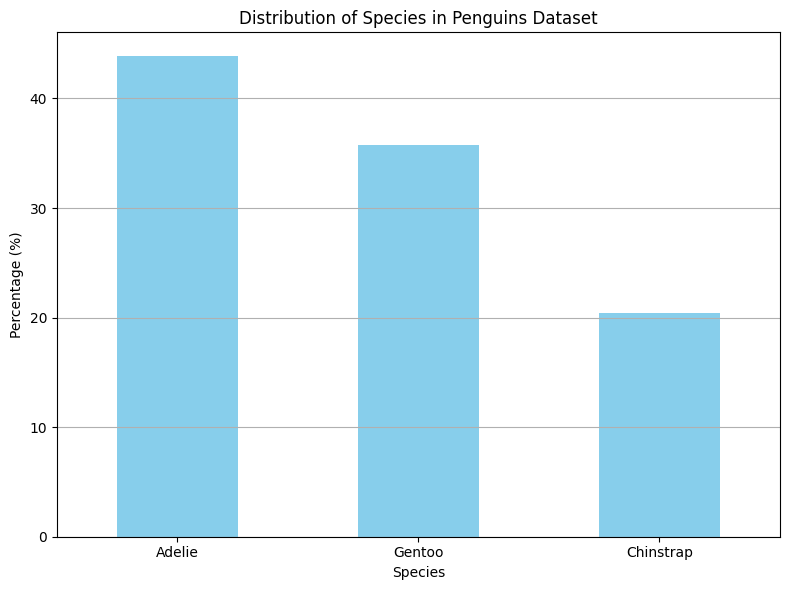

In [15]:
# Plotting the distribution for 'species' in penguins_data
# Then use bash to convert the PNG to GIF in folder "result": magick convert penguin-classes.png penguin-classes.gif
species_counts = penguins_data['species'].value_counts(normalize=True) * 100
species_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Distribution of Species in Penguins Dataset')
plt.ylabel('Percentage (%)')
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#plt.savefig('./result/penguin-classes.png')
plt.close()

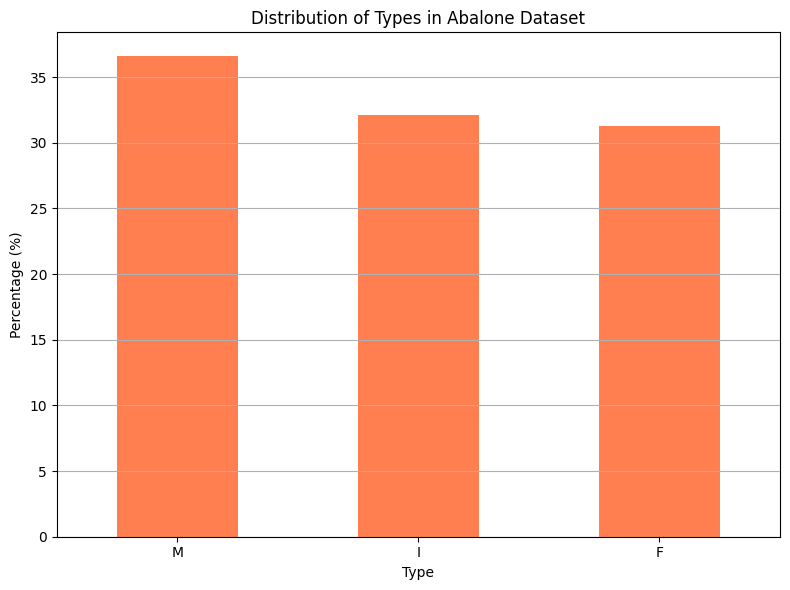

In [16]:
# Plotting the distribution for 'Type' in abalone_data
# Then use bash to convert the PNG to GIF in folder "result": magick convert abalone-classes.png penguin-classes.gif
type_counts = abalone_data['Type'].value_counts(normalize=True) * 100
type_counts.plot(kind='bar', color='coral', figsize=(8, 6))
plt.title('Distribution of Types in Abalone Dataset')
plt.ylabel('Percentage (%)')
plt.xlabel('Type')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#plt.savefig('./result/abalone-classes.png')
plt.close()